# Predicting Coupon Acceptance

## Problem Statement: 
#### The goal of this project is to leverage machine learning techniques to analyze driving scenarios and user attributes collected from an e-commerce website. By accurately predicting whether users will accept coupons during their journeys, the aim is to optimize coupon distribution strategies and enhance user engagement with the platform's offerings.

## Import Necessary Libraries

In [167]:
# Import necessary libraries
import os
import numpy as np   # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import seaborn as sns  # Import Seaborn for enhanced data visualization

# Import machine learning utilities
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Encode categorical variables and standardize features
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron  # Import Logistic Regression model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Import XGBoost library for gradient boosting
import xgboost as xgb  # Import the XGBoost library
from xgboost import XGBClassifier  # Import XGBoost classifier for supervised learning tasks

# Import metrics for model evaluation
from sklearn.metrics import accuracy_score, classification_report  # Evaluate model performance
# Set the Seaborn style for better visualization
sns.set()  # Enhances the aesthetics of plots

# Suppress warnings to avoid cluttering the output
import warnings  
warnings.filterwarnings('ignore')  # Ignores all warning messages

## Loading the Dataset

In [3]:
# Load dataset from a CSV file into a Pandas DataFrame
df = pd.read_csv("Coupon_Data.csv")  

# Display the first few rows of the dataset to get an overview of the data structure
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# Check dataset info including column names, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [173]:
# Check the dimensions of the dataset (number of rows and columns)
df.shape

(12393, 24)

In [175]:
#Checking for Duplicate Values
df.duplicated().sum()

250

In [177]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates(ignore_index=True)

# Check the number of remaining duplicate rows (should be 0 if all were removed)
df.duplicated().sum()

0

In [13]:
# Generate descriptive statistics for numerical columns in the dataset
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12393.000000,12393.000000,12393.0,12393.000000,12393.000000,12393.000000,12393.000000,12393.000000
mean,63.252643,0.415557,1.0,0.563625,0.118051,0.213750,0.786250,0.565803
std,19.075396,0.492838,0.0,0.495955,0.322681,0.409969,0.409969,0.495671
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
#Checking the names of the columns in our given dataset
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

## Checking Missing Values

In [17]:
#Finding the nullvalues in the dataset
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12287
Bar                       106
CoffeeHouse               215
CarryAway                 148
RestaurantLessThan20      128
Restaurant20To50          188
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [19]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().sum()/len(df) *100

# Filter columns that have missing values and sort them in descending order
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# The resulting 'missing_values' Series contains only columns with missing data, sorted by highest percentage first
missing_values

car                     99.144678
CoffeeHouse              1.734850
Restaurant20To50         1.516985
CarryAway                1.194223
RestaurantLessThan20     1.032841
Bar                      0.855322
dtype: float64

## Dropping the Inessential columns

In [21]:
# Drop the column named "car" from the dataset as it contains 99% null values
df.drop(columns=["car"], inplace=True)

# Check for remaining missing values in the dataset
df.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     106
CoffeeHouse             215
CarryAway               148
RestaurantLessThan20    128
Restaurant20To50        188
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Accept(Y/N?)              0
dtype: int64

In [23]:
# Fill missing categorical values with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill missing numerical values with median (to prevent outlier influence)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify missing values are handled
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept(Y/N?)            0
dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12393 entries, 0 to 12392
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12393 non-null  object
 1   passanger             12393 non-null  object
 2   weather               12393 non-null  object
 3   temperature           12393 non-null  int64 
 4   coupon                12393 non-null  object
 5   expiration            12393 non-null  object
 6   gender                12393 non-null  object
 7   age                   12393 non-null  object
 8   maritalStatus         12393 non-null  object
 9   has_children          12393 non-null  int64 
 10  education             12393 non-null  object
 11  occupation            12393 non-null  object
 12  income                12393 non-null  object
 13  Bar                   12393 non-null  object
 14  CoffeeHouse           12393 non-null  object
 15  CarryAway             12393 non-null

In [33]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        1
direction_same           1
direction_opp            1
Accept(Y/N?)             2
dtype: int64

## Encoding using LabelEncoder

In [35]:
from sklearn.preprocessing import LabelEncoder  

# Identify categorical columns (columns with object data type)
categorical_cols = df.select_dtypes(include=['object']).columns  

# Initialize Label Encoder
label_enc = LabelEncoder()  

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])  # Convert categorical values into numerical labels  

# Verify encoding by displaying the first few rows and dataset info
df.head()  # Check the transformed data


,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,1,0,2,55.0,4,0,0,0,3,1.0,...,4,0,1,0,1.0,0.0,0.0,0.0,1.0,1.0
1,1,1,2,80.0,2,1,0,0,3,1.0,...,4,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,1,2,80.0,1,1,0,0,3,1.0,...,4,0,1,0,1.0,1.0,0.0,0.0,1.0,1.0
3,1,1,2,80.0,2,1,0,0,3,1.0,...,4,0,1,0,1.0,1.0,0.0,0.0,1.0,0.0
4,1,1,2,80.0,2,0,0,0,3,1.0,...,4,0,1,0,1.0,1.0,0.0,0.0,1.0,0.0


In [37]:
df.dtypes

destination               int32
passanger                 int32
weather                   int32
temperature             float64
coupon                    int32
expiration                int32
gender                    int32
age                       int32
maritalStatus             int32
has_children            float64
education                 int32
occupation                int32
income                    int32
Bar                       int32
CoffeeHouse               int32
CarryAway                 int32
RestaurantLessThan20      int32
Restaurant20To50          int32
toCoupon_GEQ5min        float64
toCoupon_GEQ15min       float64
toCoupon_GEQ25min       float64
direction_same          float64
direction_opp           float64
Accept(Y/N?)            float64
dtype: object

## EDA(Exploratory Data Analysis)

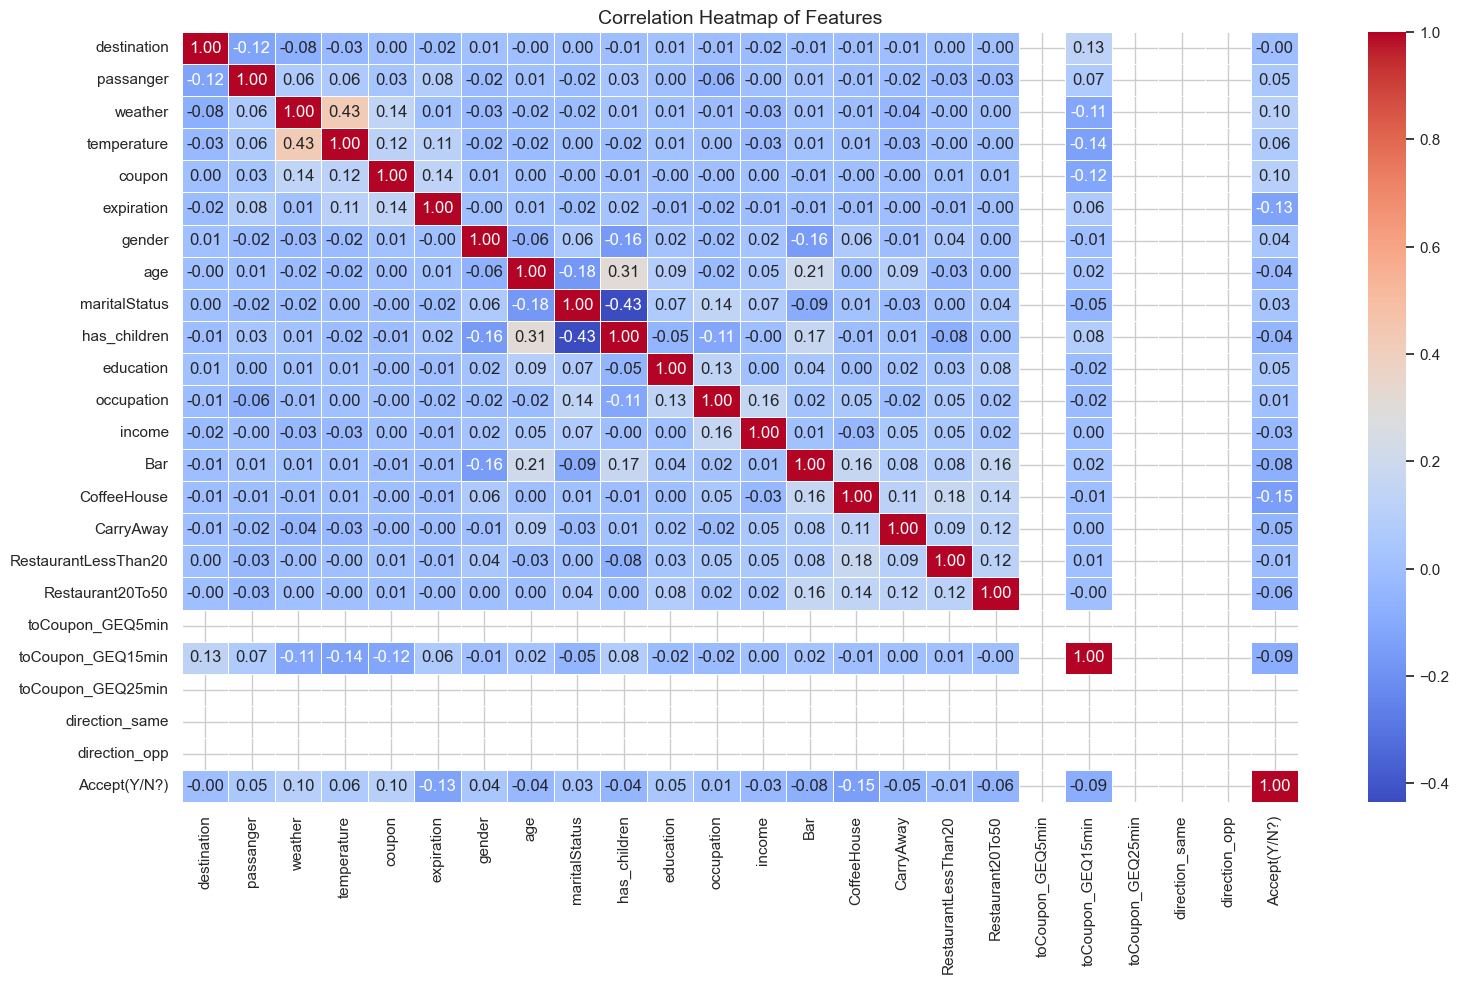

In [119]:
# Compute correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18,10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Features", fontsize=14)

# Show the plot
plt.show()

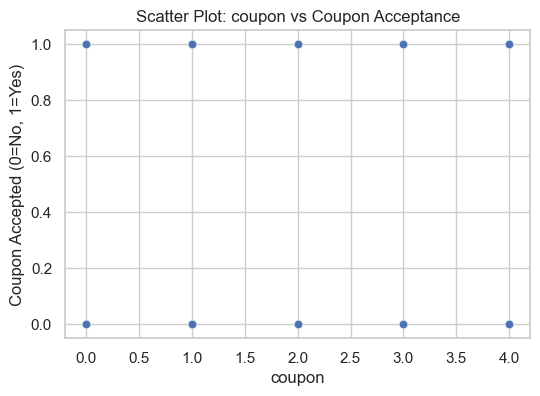

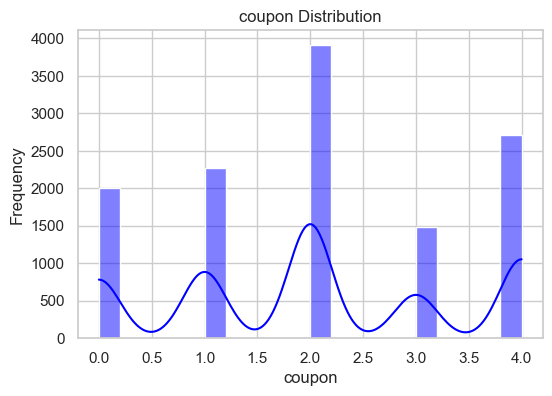

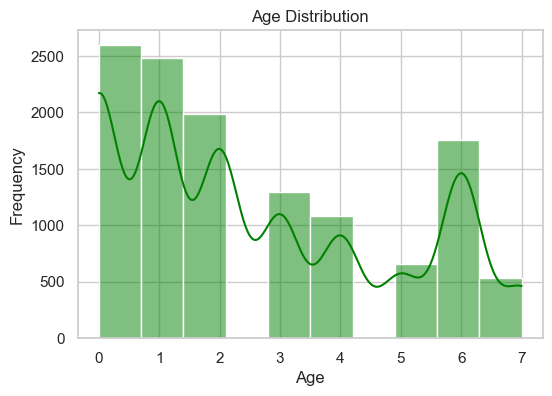

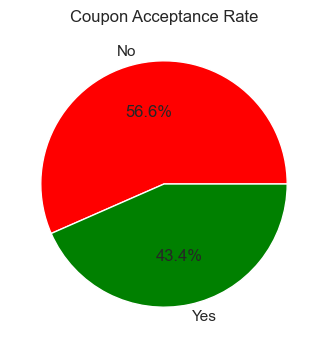

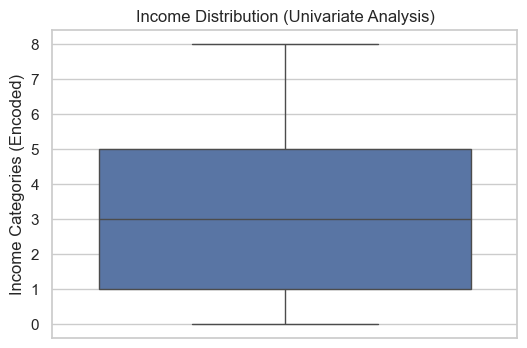

In [121]:
# Set style for better visualization
sns.set(style="whitegrid")

# Scatter Plot: Temperature vs. Coupon Acceptance
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["coupon"], y=df["Accept(Y/N?)"], alpha=0.5)
plt.title("Scatter Plot: coupon vs Coupon Acceptance")
plt.xlabel("coupon")
plt.ylabel("Coupon Accepted (0=No, 1=Yes)")
plt.show()

# Distribution Plot: Temperature
plt.figure(figsize=(6, 4))
sns.histplot(df["coupon"], bins=20, kde=True, color='blue')
plt.title("coupon Distribution")
plt.xlabel("coupon")
plt.ylabel("Frequency")
plt.show()

# Histogram: Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["age"], bins=10, kde=True, color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Pie Chart: Coupon Acceptance Rate
plt.figure(figsize=(6, 4))
df["Accept(Y/N?)"].value_counts().plot.pie(autopct="%1.1f%%", colors=["red", "green"], labels=["No", "Yes"])
plt.title("Coupon Acceptance Rate")
plt.ylabel("")
plt.show()

# Univariate Analysis: Box plot for income distribution
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["income"])
plt.title("Income Distribution (Univariate Analysis)")
plt.ylabel("Income Categories (Encoded)")
plt.show()

# Multivariate Analysis: Correlation Heatmap
#plt.figure(figsize=(18, 10))
#sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
#plt.title("Feature Correlation Heatmap")
#plt.show()


In [47]:
!pip install dtale

In [188]:
# Import the D-Tale library for interactive data exploration
import dtale
# Launch an interactive web-based interface to explore the DataFrame
dtale.show(df)

## Model Evaluation

In [124]:
# Define features (X) and target (y)
X = df.drop(columns=["Accept(Y/N?)"])  # Features (X): This removes the target column ("Accept(Y/N?)") from the dataframe to create the feature set.
y = df["Accept(Y/N?)"]  # Target (y): This selects the target column ("Accept(Y/N?)"), which is the label you're trying to predict.

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=101, stratify=y) 
# train_test_split: This splits your dataset into training and test sets.
# test_size=0.2 means 20% of the data will be used as the test set, and the remaining 80% will be used for training.
# random_state=42 ensures that the split is reproducible, meaning you'll get the same train/test split every time.

print("Train shape:", X_train.shape)  # This prints the shape of the training feature set (X_train).
print("Test shape:", X_test.shape)    # This prints the shape of the testing feature set (X_test).

Train shape: (8675, 23)
Test shape: (3718, 23)


### Random Forest Classification

In [192]:
rfmodel = RandomForestClassifier() # Initialize the Random Forest classifier
rfmodel.fit(X_train, y_train) # Train (fit) the model using training data
y_pred_train = rfmodel.predict(X_train) # Make predictions on the training data
y_pred_test = rfmodel.predict(X_test) # Make predictions on the test data
print("Training Accuracy :", accuracy_score(y_train, y_pred_train)) # Calculate and print the accuracy on training data
print()
print("Test accuracy :", accuracy_score(y_test, y_pred_test)) # Calculate and print the accuracy on test data

Training Accuracy : 0.9881268011527378

Test accuracy : 0.7272727272727273


In [194]:
# Import cross-validation function
from sklearn.model_selection import cross_val_score
training = cross_val_score(rfmodel, X_train, y_train, cv=10) # Perform 10-fold cross-validation on the training set
print(training) # Print the accuracy scores for each fold
print('********')
print(training.mean()) # Print the mean accuracy across all folds

[0.72580645 0.74078341 0.69470046 0.72580645 0.73617512 0.74048443
 0.7289504  0.73010381 0.75893887 0.72318339]
********
0.7304932789054901


### XG Boost Classifier

In [197]:
# Initialize the XGBoost classifier
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train) # Train (fit) the model using the training data
y_pred_train = xgbmodel.predict(X_train) # Make predictions on the training data
y_pred_test = xgbmodel.predict(X_test) # Make predictions on the test data
print("Training Accuracy :", accuracy_score(y_train, y_pred_train)) # Calculate and print the accuracy on training data
print()
print("Test accuracy :", accuracy_score(y_test, y_pred_test)) # Calculate and print the accuracy on test data

Training Accuracy : 0.9259942363112392

Test accuracy : 0.7401828940290479


In [199]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(xgbmodel, X_train, y_train, cv=10) # Perform 10-fold cross-validation on the training set
print(training)  # Print the accuracy scores for each fold
print('********')
print(training.mean())  # Print the mean accuracy across all folds

[0.73732719 0.74539171 0.7281106  0.73041475 0.74884793 0.74971165
 0.7727797  0.73010381 0.76585928 0.75547866]
********
0.7464025268551444


### Evaluating Other Models

In [202]:
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "Perceptron": Perceptron(),
    "SVC": SVC(),
    "LinearSVC": LinearSVC(),
    "K-Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Decision Tree": DecisionTreeClassifier(),
    
    
    
}

# Loop through models, train, predict, and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract precision, recall, and F1 score for each class dynamically
    class_metrics = {}
    for label in report.keys():
        if label != 'accuracy':  # Exclude 'accuracy' key
            class_metrics[f"Precision (Class {label})"] = report[label].get('precision', 0)
            class_metrics[f"Recall (Class {label})"] = report[label].get('recall', 0)
            class_metrics[f"F1-score (Class {label})"] = report[label].get('f1-score', 0)

    # Save results, ensuring to handle missing class data
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        **class_metrics
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Display the results, sorted by accuracy
print(results_df.sort_values(by="Accuracy", ascending=False))

                    Model  Accuracy  Precision (Class 0.0)  \
1       Gradient Boosting  0.718397               0.702935   
10          Decision Tree  0.683163               0.637975   
2                AdaBoost  0.677515               0.644398   
8    Gaussian Naive Bayes  0.631522               0.596367   
9   Bernoulli Naive Bayes  0.623722               0.590109   
3        Ridge Classifier  0.622916               0.588040   
0     Logistic Regression  0.622647               0.587118   
6               LinearSVC  0.622647               0.587552   
7             K-Neighbors  0.608930               0.552980   
5                     SVC  0.572351               0.642857   
4              Perceptron  0.565896               0.000000   

    Recall (Class 0.0)  F1-score (Class 0.0)  Precision (Class 1.0)  \
1             0.608426              0.652275               0.727704   
10            0.624535              0.631183               0.716558   
2             0.573730              0.6070

## Feature Importance

In [205]:
# Get feature importance values from the trained model
importances = model.feature_importances_

# Retrieve the feature names from the dataset
feature_names = X.columns

# Create a DataFrame to store feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(25))

                 Feature  Importance
4                 coupon    0.110575
11            occupation    0.100267
12                income    0.074622
7                    age    0.073271
13                   Bar    0.057852
1              passanger    0.056726
14           CoffeeHouse    0.056344
10             education    0.055415
0            destination    0.050808
15             CarryAway    0.046270
17      Restaurant20To50    0.046206
16  RestaurantLessThan20    0.042831
5             expiration    0.041348
2                weather    0.040133
8          maritalStatus    0.037963
19     toCoupon_GEQ15min    0.035104
3            temperature    0.035042
6                 gender    0.021782
9           has_children    0.017442
18      toCoupon_GEQ5min    0.000000
20     toCoupon_GEQ25min    0.000000
21        direction_same    0.000000
22         direction_opp    0.000000


Train shape: (8675, 23)
Test shape: (3718, 23)


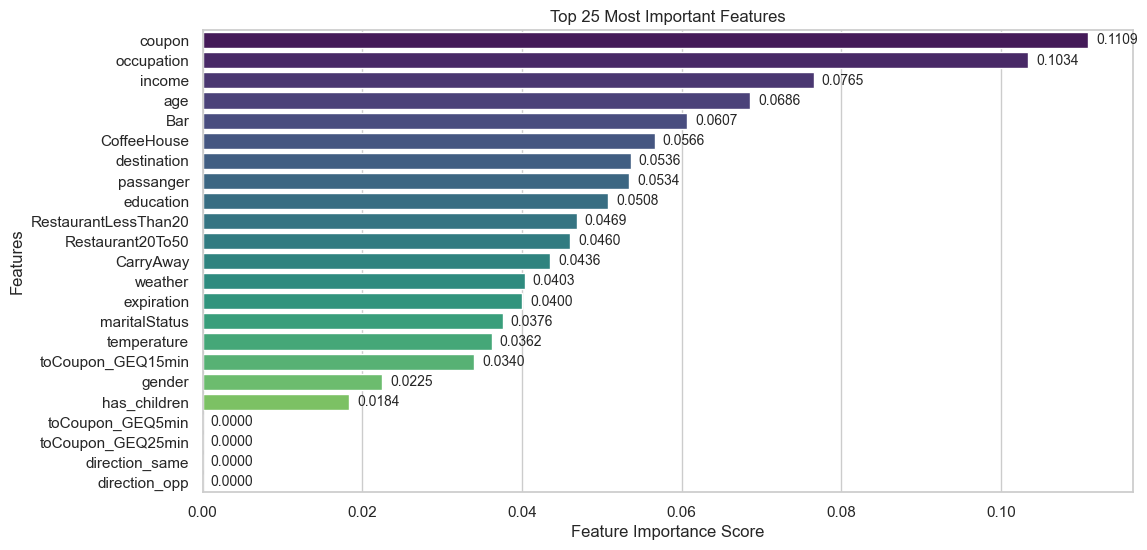

In [155]:
# Define features (X) and target (y)
X = df.drop(columns=["Accept(Y/N?)"])  # Features (X): This removes the target column ("Accept(Y/N?)") from the dataframe to create the feature set.
y = df["Accept(Y/N?)"]  # Target (y): This selects the target column ("Accept(Y/N?)"), which is the label you're trying to predict.

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)   
# train_test_split: This splits your dataset into training and test sets.
# test_size=0.2 means 20% of the data will be used as the test set, and the remaining 80% will be used for training.
# random_state=42 ensures that the split is reproducible, meaning you'll get the same train/test split every time.

print("Train shape:", X_train.shape)  # This prints the shape of the training feature set (X_train).
print("Test shape:", X_test.shape)    # This prints the shape of the testing feature set (X_test).
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure feature importance data is in DataFrame format
feature_importance_df = pd.DataFrame({
    "Feature": feature_names, 
    "Importance": importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Ensure it's a DataFrame, not a Series
if isinstance(feature_importance_df, pd.Series):
    feature_importance_df = feature_importance_df.to_frame()

# Set figure size
plt.figure(figsize=(12, 6))

# Plot top 25 important features
sns.barplot(
    x="Importance", 
    y="Feature", 
    data=feature_importance_df.head(25),  # Ensure this is a DataFrame
    palette="viridis"
)

# Add labels and title
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 25 Most Important Features")

# Display importance values on bars
for index, value in enumerate(feature_importance_df["Importance"].head(25)):
    plt.text(value + 0.001, index, f"{value:.4f}", va="center", fontsize=10)

# Show the plot
plt.show()

## Predicting on Train and Test Data

In [210]:
# Predict on test data and trained data
y_pred = model.predict(X_test) # Predict the target variable for the test set using the trained model
y_pred_train = model.predict(X_train) # Predict the target variable for the training set using the trained model

# Get accuracy
accuracy_1 = accuracy_score(y_test, y_pred) # Calculate the accuracy of the model on the test set
accuracy_2 = accuracy_score(y_train, y_pred_train)  # Calculate the accuracy of the model on the training set

# Print the accuracy results
print(f"Test Set Model Accuracy: {accuracy_1:.4f}") # Print the accuracy on the test set
print(f"Training Set Model Accuracy: {accuracy_2:.4f}") # Print the accuracy on the training set

# Detailed classification report (Precision, Recall, F1-score)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))  # Generate and print the classification report for the test set
print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_pred_train))  # Generate and print the classification report for the training set

Test Set Model Accuracy: 0.6832
Training Set Model Accuracy: 0.9881

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       0.64      0.62      0.63      1614
         1.0       0.72      0.73      0.72      2104

    accuracy                           0.68      3718
   macro avg       0.68      0.68      0.68      3718
weighted avg       0.68      0.68      0.68      3718


Classification Report for Training Data:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      3767
         1.0       1.00      0.98      0.99      4908

    accuracy                           0.99      8675
   macro avg       0.99      0.99      0.99      8675
weighted avg       0.99      0.99      0.99      8675



In [212]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model, X_train, y_train, cv=10)
print(training)
print('************************')
print(training.mean())

[0.66589862 0.67626728 0.65207373 0.68778802 0.68087558 0.67589389
 0.6805075  0.67474048 0.66551326 0.68512111]
************************
0.674467946571418


## Cross-Validation Scores on Train Data

In [217]:
# Cross Validation Score on Train Data
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "Perceptron": Perceptron(),
    "SVC": SVC(),
    "LinearSVC": LinearSVC(),
    "K-Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    
}

# Store results for cross-validation
cv_results = []

# Loop through models, calculate cross-validation score and store the results
for name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_cv_score = np.mean(cv_score)  # Mean of the cross-validation scores
    cv_results.append({
        "Model": name,
        "Cross-Val Accuracy (Mean)": mean_cv_score,
        "Cross-Val Std Dev": np.std(cv_score)  # Standard deviation of the cross-validation scores
    })

# Convert the results to a DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Display the results, sorted by mean cross-validation score
print(cv_results_df.sort_values(by="Cross-Val Accuracy (Mean)", ascending=False))

                    Model  Cross-Val Accuracy (Mean)  Cross-Val Std Dev
12                XGBoost                   0.742478           0.008529
1           Random Forest                   0.725879           0.005974
2       Gradient Boosting                   0.716311           0.007990
3                AdaBoost                   0.675850           0.008082
11          Decision Tree                   0.668473           0.009509
10  Bernoulli Naive Bayes                   0.627205           0.010938
0     Logistic Regression                   0.619366           0.005851
4        Ridge Classifier                   0.619020           0.005659
7               LinearSVC                   0.618790           0.005475
9    Gaussian Naive Bayes                   0.610259           0.011279
8             K-Neighbors                   0.606225           0.015325
5              Perceptron                   0.572219           0.007762
6                     SVC                   0.568069           0

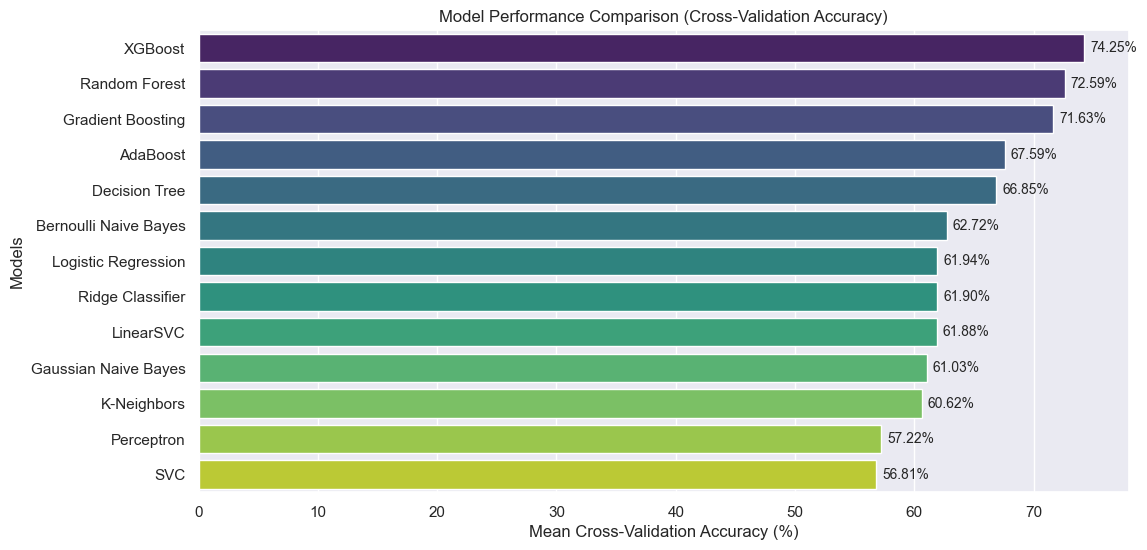

In [218]:
# Convert accuracy scores to percentages
cv_results_df_sorted = cv_results_df.sort_values(by="Cross-Val Accuracy (Mean)", ascending=False)
cv_results_df_sorted["Cross-Val Accuracy (Mean)"] *= 100  # Convert to percentage

# Set figure size
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot
sns.barplot(
    x="Cross-Val Accuracy (Mean)", 
    y="Model", 
    data=cv_results_df_sorted, 
    palette="viridis"
)

# Add labels and title
plt.xlabel("Mean Cross-Validation Accuracy (%)")
plt.ylabel("Models")
plt.title("Model Performance Comparison (Cross-Validation Accuracy)")

# Display percentage labels on bars
for index, value in enumerate(cv_results_df_sorted["Cross-Val Accuracy (Mean)"]):
    plt.text(value + 0.5, index, f"{value:.2f}%", va="center", fontsize=10)

# Show the plot
plt.show()